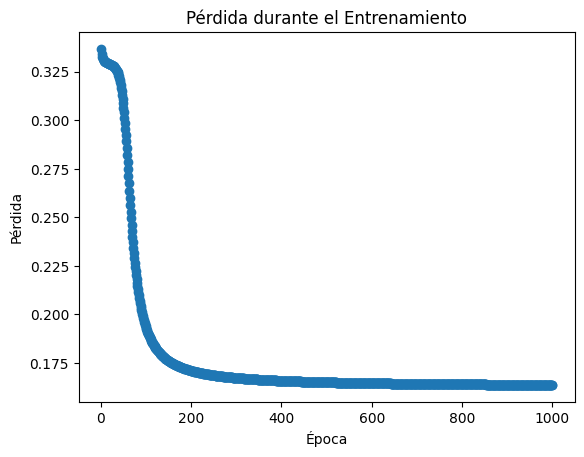

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Función de activación sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivada de la función de activación sigmoide
def sigmoid_derivative(x):
    return x * (1 - x)

# Inicialización de pesos y sesgos
np.random.seed(42)
input_size = X_train.shape[1]
hidden_size = 5
output_size = len(np.unique(y))
learning_rate = 0.01
epochs = 1000

weights_input_hidden = np.random.uniform(size=(input_size, hidden_size))
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.uniform(size=(hidden_size, output_size))
bias_output = np.zeros((1, output_size))

# Entrenamiento utilizando retropropagación
losses = []

for epoch in range(epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X_train, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output_layer_output = sigmoid(output_layer_input)
    
    # Calcular la pérdida
    loss = np.mean(0.5 * (y_train.reshape(-1, 1) - output_layer_output) ** 2)
    losses.append(loss)
    
    # Backpropagation
    output_layer_error = y_train.reshape(-1, 1) - output_layer_output
    output_layer_delta = output_layer_error * sigmoid_derivative(output_layer_output)
    hidden_layer_error = output_layer_delta.dot(weights_hidden_output.T)
    hidden_layer_delta = hidden_layer_error * sigmoid_derivative(hidden_layer_output)
    
    # Actualizar pesos y sesgos
    weights_hidden_output += learning_rate * hidden_layer_output.T.dot(output_layer_delta)
    bias_output += learning_rate * np.sum(output_layer_delta, axis=0, keepdims=True)
    weights_input_hidden += learning_rate * X_train.T.dot(hidden_layer_delta)
    bias_hidden += learning_rate * np.sum(hidden_layer_delta, axis=0)

# Visualización de la pérdida durante el entrenamiento
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el Entrenamiento')
plt.show()

In [4]:
from sklearn.metrics import accuracy_score

# Función de predicción
def predict(X):
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output_layer_output = sigmoid(output_layer_input)
    return np.argmax(output_layer_output, axis=1)

# Realizar predicciones en el conjunto de prueba
y_pred = predict(X_test)

# Calcular la precisión en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión en el conjunto de prueba: {accuracy:.2f}')


Precisión en el conjunto de prueba: 0.07


(array([0, 1, 0, 2, 0, 1, 2, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 0, 1, 2,
        1, 0, 0, 0, 0, 0, 1, 1]),
 array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]))